,Description,Value
0,session_id,7883
1,Target,ref_pm2_5
2,Original Data,"(10932, 15)"
3,Missing Values,False
4,Numeric Features,14
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(7652, 12)"


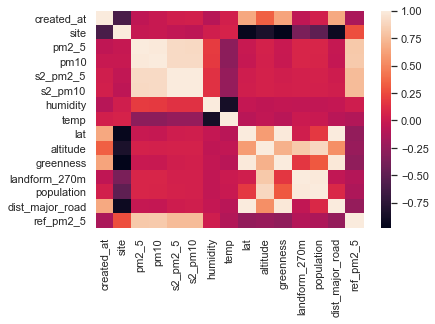

In [45]:
%matplotlib inline
import os
import seaborn as sns
from pycaret.regression import *
import matplotlib.pyplot  as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
import math
import numpy as np
import pandas as pd
from datetime import datetime
sns.set()
df = pd.read_csv(r'C:/Users/USER/kagglesync/Zindi_Air/Train.csv')
df_test = pd.read_csv(r'C:/Users/USER/kagglesync/Zindi_Air/Test.csv')

cols_to_fillna = ['humidity','temp']

for i in cols_to_fillna:
    df[i].fillna(np.mean(df[i]),inplace=True)

print(df.info())
labelencoder=LabelEncoder()
df.fillna(-1,inplace=True)
df['site']=labelencoder.fit_transform(df['site'])

df['created_at'] = df['created_at'].apply(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S+03:00"))
df['created_at']=labelencoder.fit_transform(df['created_at'])
cols_to_drop = ['ID','landform_90m','long']

df.drop(cols_to_drop,axis=1,inplace=True)
print(df.head())
sns.heatmap(df.corr())

minmax_scale = MinMaxScaler()

X = df.drop(['ref_pm2_5'],axis=1)
data_x = pd.DataFrame(minmax_scale.fit_transform(X),columns=X.columns)
data_x['ref_pm2_5'] = df['ref_pm2_5']
print(data_x.head())
Y = df['ref_pm2_5']


pycaret_set = setup(data=data_x,target='ref_pm2_5')

In [46]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,6.6295,163.2178,12.5275,0.8729,0.2577,0.2816,7.0640
lightgbm,Light Gradient Boosting Machine,6.9185,173.4339,12.8986,0.8650,0.2646,0.3369,0.4270
gbr,Gradient Boosting Regressor,7.1694,188.6510,13.4584,0.8533,0.2840,0.4318,0.8680
rf,Random Forest Regressor,7.3183,209.4153,14.2202,0.8363,0.3091,0.5697,3.1690
et,Extra Trees Regressor,7.5237,220.3873,14.6202,0.8270,0.3201,0.5875,2.5540
knn,K Neighbors Regressor,8.2651,237.9427,15.2323,0.8136,0.3285,0.5637,0.0400
ridge,Ridge Regression,8.8098,265.9366,16.0564,0.7928,0.3608,0.7052,0.0180
br,Bayesian Ridge,8.8241,265.9876,16.0572,0.7927,0.3644,0.7061,0.0140
lr,Linear Regression,8.8287,266.0629,16.0595,0.7926,0.3647,0.7063,0.0200
lar,Least Angle Regression,8.8345,266.0436,16.0593,0.7926,0.3650,0.7061,0.0150


In [47]:
##create a catboost regressor model
catboost_reg = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.0427,212.8958,14.5910,0.8330,0.2761,0.3348
1,6.1743,104.4860,10.2218,0.9235,0.2023,0.1576
2,6.3002,117.9458,10.8603,0.8967,0.2358,0.2086
3,6.2523,114.6640,10.7081,0.8965,0.3124,0.3892
4,6.7291,124.6433,11.1644,0.8942,0.3133,0.5529
5,7.2024,335.9241,18.3282,0.7662,0.2517,0.1788
6,6.5019,227.2694,15.0755,0.8210,0.2151,0.1554
7,6.8344,135.5947,11.6445,0.8904,0.2831,0.4242
8,6.2759,109.4326,10.4610,0.9129,0.2634,0.2176
9,6.9818,149.3222,12.2197,0.8941,0.2234,0.1971
